## Horizontal, Multilateral and Intelligent Wells 
#### Project 1.1 
#### Author:  <span style="color:blue"> Enrique Losoya - 01/31/2018 </span>.
###### Assigment 1 
######  Program Furui's model for Horizontal Well performance 

### Calculation Tools for Horizontal Well Performance

The objective of this project to develop a computation tool that can be used to calculate horizontal well performance. The following models are coded below:

1.	Furui’s Model
2.	Babu and Odeh Model with partial penetration skin factor
3.	Segment approach to count for wellbore pressure drop effect on flow rate distribution for single-phase wells



### 1.- Furui's Model

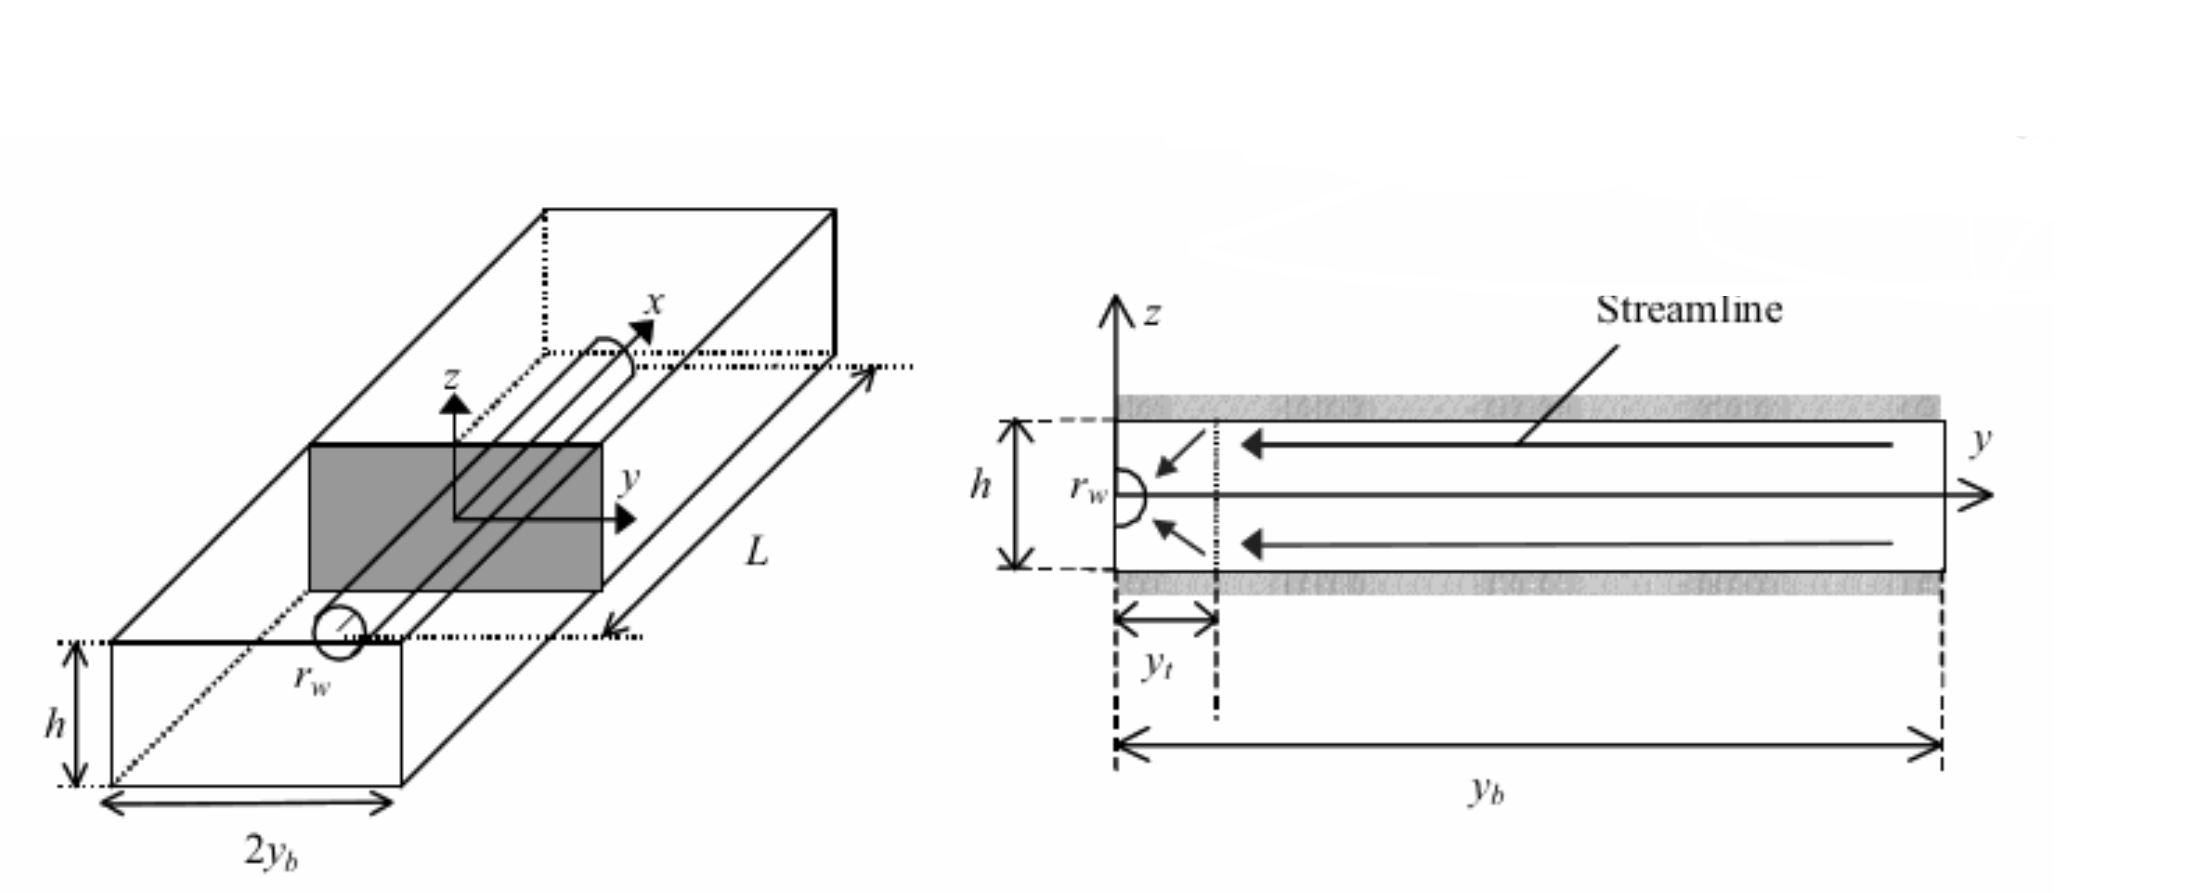

In [63]:
from IPython.display import Image
Image("images/furui.jpg") 

<h5><center>Furui representatio of flow in a rectangular shaped reservoir - From Furui et at. (2003) </center></h5> 

Furui well performance equation is given by: 

$$q =\frac{ k L (P_e - P_{wf} ) }{ 141.2 \mu B_o *( ln [\frac{h I_{ani} } { r_w( I_{ani} + 1) }] + \frac{\pi y_b}{h I_{ani} } - 1.224 + s)}  $$

Where : 

| Symbol    | Meaning                     | Units       |
|---------|-----------------------------|-------------|
| k         | Permeability                | md          |
| L         | Length                      | ft          |
| h         | Reservoir thickness         | ft          |
| $P_e$     | Boundary reservoir pressure | psia        |
| $P_{wf}$  | Wellbore pressure           | psia        |
| $\mu$     | Viscosity                   | cp          |
| $B_o$     | Oil gas ratio               | STB/RSTB    |
| $I_{ani}$ | Anisotropic permeability    |             |
| $R_w$     | Wellbore radius             | ft          |
| s         | Skin factor                 |             |
| q         | Flow rate                   | stb/day/psi |

<h4><center>Typical Units for Production Engineering Calculations</center></h4><table>

| Variable        | Oilfield Unit | SI Unit | Conversion (Multiply SI Unit) |
|-----------------|---------------|---------|-------------------------------|
| Area            | acre          | m2      | 2.475 × 10–4                  |
| Compressibility | psi–1         | Pa–1    | 6897                          |
| Length          | ft            | m       | 3.28                          |
| Permeability    | md            | m2      | 1.01 × 1015                   |
| Pressure        | psi           | Pa      | 1.45 × 10–4                   |
| Rate (oil)      | STB/d         | m3/s    | 5.434 × 105                   |
| Rate (gas)      | Mscf/d        | m3/s    | 3049                          |
| Viscosity       | cp            | Pa-s    | 1000                          |

The well variables are defined in a text file called "well_config.ini" in the working directory. You could change them there or use option b to input them directly by selecting. The program uses the data provided on the instructions document by default. You can modify the input parameters by changing the sliders' values, (double click on value for direct value)

In [64]:
import ipywidgets as widgets
from IPython.display import display
Well_Config_Buttom = widgets.ToggleButtons(
    options=['Custom', 'Well B','Well A (Default)'],
    description='Well Config:',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=["Well A (Default)", "Well B", "Well C", "Dafult variables will require the users' input"],
#     icons=['check'] * 3
)
display(Well_Config_Buttom)

A Jupyter Widget

Common input: 0.25-ft casing size and 4-1/2 in producing tubing. Drawdown is 1,000 psi and reservoir pressure is 3,000 psi. thickness h is 150 ft. Iani is 3.16. Reservoir width is 1,000 ft, and length is 20,000 ft. Compare the results of segment and non-segment and comment.

In [65]:
try:
    from configparser import ConfigParser
except ImportError:
    from ConfigParser import ConfigParser  # ver. < 3.0
def f(x):
    return x
from IPython.display import HTML, display
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Button, RadioButtonGroup, Select, Slider
from bokeh.models import CustomJS, ColumnDataSource, Slider

Wellconfig = ConfigParser()
Wellconfig.read('well_config.ini')

Well_Name = 'Well A'
if Well_Config_Buttom.value == 'Well A (Default)' :
    print('Using default values from .Ini file')
    kh = Wellconfig.getfloat(Well_Name, 'kh')
    kv = Wellconfig.getfloat(Well_Name, 'kv')
    Iani = Wellconfig.getfloat(Well_Name, 'Iani')
    L = Wellconfig.getfloat(Well_Name, 'L')
    Bo = Wellconfig.getfloat(Well_Name, 'B')
    mu = Wellconfig.getfloat(Well_Name, 'mu')
    s = Wellconfig.getfloat(Well_Name, 's')
    rw = Wellconfig.getfloat(Well_Name, 'rw')
    yb = Wellconfig.getfloat(Well_Name, 'yb')
    h = Wellconfig.getfloat(Well_Name, 'h')
    Pe = Wellconfig.getfloat(Well_Name, 'Pe')
    Pwf = Wellconfig.getfloat(Well_Name, 'Pwf')  
    #Write variables to a new .ini file in the working directory
    with open('Well_profile_used.ini', 'w') as configfile: 
        Wellconfig.write(configfile)
    #Display the inputted data to the user 
    print('I am now using the following variables:')
    data = [[Well_Name,'', ' data'  ], 
         [ '','Kh   = ', kh  ,' ' , 'Kv = ', kv],
         [ '','Iani = ', Iani,' ' ,'L = ', L],
         [ '','B    = ', Bo   ,' ' ,'u = ', mu],
         [ '','s    = ', s   ,' ' ,'Rw = ', rw],
         [ '','Yb    =', yb  ,' ' ,'h = ', h],
         [ '','Pe    =', Pe  ,' ' ,'Pwf = ', Pwf],
       ]
    display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
                    )))
else:
    print('Please modify the well parameters manually:')
    kh_Slider=  widgets.FloatSlider( value=10.0, min=0, max=100.0, step=0.1, description='$K_h$:', disabled=False,
    continuous_update=False, orientation='horizontal', readout=True, readout_format='0.1f')
    kv_Slider  = widgets.FloatSlider( description='$K_v$:', value=1.0, min=0, max=100.0, step=0.1, continuous_update=False)
    Iani_Slider= widgets.FloatSlider( description='$I_{ani}$:', value=3.16, min=0, max=100.0, step=0.1, continuous_update=False)
    #Iani_Slider.observe(handle_slider_change, names='value')
    L_Slider   = widgets.FloatSlider( description='$L$:',   value=4000.0, min=0, max=30000.0, step=1.0, continuous_update=False)
    Bo_Slider  = widgets.FloatSlider( description='$B_o$:', value=1.1, min=0, max = 100.0, step=0.1, continuous_update=False)
    mu_Slider  = widgets.FloatSlider( description='$\mu$:', value=2.0, min=0, max = 100.0, step=0.1, continuous_update=False)
    s_Slider   = widgets.FloatSlider( description='$s$:',   value=0.0, min=0, max = 100.0, step=0.1,continuous_update=False)
    rw_Slider  = widgets.FloatSlider( description='$R_w$:', value=0.25, min=0, max=5.0, step=0.05,continuous_update=False)
    yb_Slider  = widgets.FloatSlider( description='$Y_b$:', value=500.0, min=0, max=30000.0, step=1.0,continuous_update=False)
    h_Slider  = widgets.FloatSlider( description='$h$:',    value=100.0, min=0.00001, max=1000.0, step=0.1,continuous_update=False)
    Pe_Slider  = widgets.FloatSlider( description='$P_e$:', value=3000.0, min=0, max=20000.0, step=0.1,continuous_update=False)
    Pwf_Slider  = widgets.FloatSlider( description='$P_{wf}$:', value=2000.0, min=0, max=20000.0, step=0.1, continuous_update=False)
    sliders_items = [kh_Slider, kv_Slider, Iani_Slider , L_Slider]
    sliders_items_2 = [ mu_Slider, s_Slider, rw_Slider, yb_Slider]
    sliders_items_3 = [h_Slider, Pe_Slider, Pwf_Slider,Bo_Slider ]
    left_box = widgets.VBox(sliders_items)
    middle_box = widgets.VBox(sliders_items_2)
    right_box = widgets.VBox(sliders_items_3)
    sliders= [kh_Slider, kv_Slider, Iani_Slider, L_Slider, Bo_Slider, mu_Slider,
    s_Slider, rw_Slider, yb_Slider, h_Slider, Pe_Slider, Pwf_Slider ]
    display(widgets.HBox([left_box, middle_box, right_box]))

Loading BokehJS ...

Please modify the well parameters manually:


A Jupyter Widget

In [66]:
    kh   = kh_Slider.value
    kv   = kv_Slider.value
    Iani = Iani_Slider.value
    L    = L_Slider.value
    Bo   = Bo_Slider.value
    mu   =  mu_Slider.value
    s    = s_Slider.value
    rw   = rw_Slider.value
    yb   = yb_Slider.value
    h    = h_Slider.value
    Pe   =  Pe_Slider.value
    Pwf  = Pwf_Slider.value

In [67]:
def on_button_clicked(b):
    if Well_Config_Buttom.value == 'Custom' :
        kh   = kh_Slider.value
        kv   = kv_Slider.value
        Iani = Iani_Slider.value
        L    = L_Slider.value
        Bo   = Bo_Slider.value
        mu   =  mu_Slider.value
        s    = s_Slider.value
        rw   = rw_Slider.value
        yb   = yb_Slider.value
        h    = h_Slider.value
        Pe   =  Pe_Slider.value
        Pwf  = Pwf_Slider.value   
        k_bar = math.sqrt(kh*kv)
        Iani = math.sqrt(kh/kv)
     #Write variables to a new .ini file in the working directory
        with open('Well_profile_used.ini', 'w') as configfile: 
            Wellconfig.write(configfile)
        #Display the inputted data to the user 
        print('I am now using the following variables:')
        data = [[Well_Name,'', ' data'  ], 
         [ '','Kh   = ', kh  ,' ' , 'Kv = ', kv],
         [ '','Iani = ', Iani,' ' ,'L = ', L],
         [ '','B    = ', Bo   ,' ' ,'u = ', mu],
         [ '','s    = ', s   ,' ' ,'Rw = ', rw],
         [ '','Yb    =', yb  ,' ' ,'h = ', h],
         [ '','Pe    =', Pe  ,' ' ,'Pwf = ', Pwf],
       ]
        display(HTML(
        '<table><tr>{}</tr></table>'.format(
            '</tr><tr>'.join(
                '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
                    )))
        print(L)

    else :
        print('Using default values form text file')
        
update_bottom =widgets.Button(
    description='Update inputs!',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Refresh inputs from sliders" values',
    icon='check'
    )
display(update_bottom)
update_bottom.on_click(on_button_clicked)        

A Jupyter Widget

I am now using the following variables:


4000.0


#### Geometric representation of well position

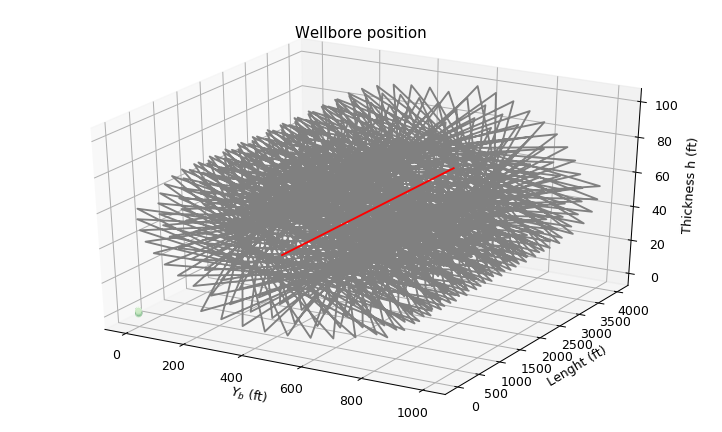

In [68]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6), dpi=90, facecolor='w')
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
interp= 400; 
#Area representing reservoir "drainage"
zline =  np.linspace(0, L, interp)
xline =  yb*np.sin(zline)+ np.repeat(yb,interp)
yline =  h/2*np.cos(np.linspace(0, L, interp)) + np.repeat(h/2,interp)

#Actual Well 
z_w =  np.linspace(0, L, interp)
x_w =  np.repeat(yb,interp)
y_w =  np.repeat(h/2,interp)
ax.set(xlabel='$Y_b$ (ft)', ylabel='Lenght (ft)', zlabel= "Thickness h (ft)", 
       title='Wellbore position')
ax.plot3D(xline, zline, yline, 'grey')
ax.plot3D(x_w, z_w, y_w, 'red')

zdata = np.random.random(10)
xdata = np.sin(zdata) +  np.random.randn(10)
ydata = np.cos(zdata) +  np.random.randn(10)
ax.scatter3D(xdata, zdata, ydata, c=zdata, cmap='Greens');



Simple computation of well derivebility using Furui's model 

In [69]:
import math 
# No delta P was given so, using 1 psi 
# FURUI model corredct Answer 
# 4304 STB/Day for 1000 delta P 
# Babu Odel 6378 STB/day 
k_bar = math.sqrt(kh*kv)
Iani = math.sqrt(kh/kv)
NUM = k_bar * L * (Pe - Pwf) 
Dem_1 = 141.2 * Bo * mu 
Dem_2 = math.log(h * Iani / (rw * ( Iani + 1))) + (math.pi * yb)/(Iani * h) - 1.224 + s
Q= NUM/(Dem_1*Dem_2)
print('Furui Flow rate, Q = ', Q, 'STB/D')

Furui Flow rate, Q =  4304.393750066649 STB/D


#### 1.- Parametric representation of wellbore lenght impact on well performance

In [26]:
import numpy as np 
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[
    ("DataPoint", "$index"),
    ("ΔP: , Qo", "$x, $y"),
],mode='vline')
delta_P= np.linspace(0, 1000, 50)
NUM = k_bar * L * (delta_P) 
Dem_2 = (141.2 * Bo * mu) * (math.log( h * Iani / (rw * ( Iani + 1))) + (math.pi * yb)/(Iani * h) - 1.224 + s)
Q= NUM/Dem_2
p = figure(title = "ΔP vs Flow performance, Q", width=800, height=500, tools=[hover])
p.circle(delta_P, Q, size=7, color="firebrick", alpha=0.5)
p.xaxis.axis_label = 'ΔP (Psi)'
p.yaxis.axis_label = 'Qo (STB/Day)'
show(p)

#### 2.- Anisotropic ratio 

In [9]:
import numpy as np 
from bokeh.layouts import row
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[
    ("DataPoint", "$index"),
    ("I_ani: , Qo", "$x, $y"),
],mode='vline')

on_button_clicked(1)

Iani= np.linspace(1, 100, 100)
NUM = k_bar * L * (Pe - Pwf) 
Dem_2 = (141.2 * Bo * mu) * (np.log( h * Iani / (rw * ( Iani + 1))) + (np.pi * yb)/(Iani * h) - 1.224 + s)
Q= NUM/Dem_2
iani_plot = figure(title = "Anisotropic ratio vs Flow performance, Q",tools=[hover])
iani_plot.circle(Iani, Q, size=7, color="DodgerBlue", alpha=0.5)
iani_plot.xaxis.axis_label = 'Iani (Dimensionless)'
iani_plot.yaxis.axis_label = 'Qo (STB/Day)'
show(row( iani_plot))

I am now using the following variables:


4000.0


In [10]:
import numpy as np 
from bokeh.layouts import row
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[
    ("DataPoint", "$index"),
    ("Yb: , Qo", "$x, $y"),
],mode='vline')

on_button_clicked(1)
yb= np.linspace(0, 500, 100)
NUM = k_bar * L * (Pe - Pwf) 
Dem_2 = (141.2 * Bo * mu) * (np.log( h * Iani / (rw * ( Iani + 1))) + (np.pi * yb)/(Iani * h) - 1.224 + s)
Q= NUM/Dem_2
Yb_plot = figure(title = "Location of Well, Yb vs Flow performance, Q",tools=[hover])
Yb_plot.circle(yb, Q, size=7, color="firebrick", alpha=0.5)
Yb_plot.xaxis.axis_label = 'Yb (ft)'
Yb_plot.yaxis.axis_label = 'Qo (STB/Day)'
show(row( Yb_plot))

I am now using the following variables:


4000.0


In [11]:
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

L_lin = np.linspace(1, 4000, num=20)

def fBokeh(kh, kv, Iani, L, Bo, mu, s, rw, yb, h, Pe, Pwf ):
    k_bar = np.sqrt(kh/kv)
    Num_1 = (k_bar * L_lin * 1)
    Dem_2 = (141.2 * Bo * mu )* (np.log( h *Iani / (rw * ( Iani + 1))) + (np.pi * yb)/(Iani * h) - 1.224 + s)
    Y = Num_1/Dem_2
    fig = figure()
    # add both a line and circles on the same plot
    fig.line(L_lin, Y, line_width=2)
    fig.circle(L_lin, Y, fill_color="green", size=8)
    # add both a line and circles on the same plot
    fig.line(L_lin, Y, line_width=2)
    fig.xaxis.axis_label = "Lenght (ft)"
    fig.yaxis.axis_label = "Production, Q (STB/Psi)"
    
    yb= np.linspace(1, 500, 100)
    NUM = k_bar * L * (Pe - Pwf) 
    Dem_2 = (141.2 * Bo * mu) * (np.log( h * Iani / (rw * ( Iani + 1))) + (np.pi * yb)/(Iani * h) - 1.224 + s)
    Q= NUM/Dem_2
    Yb_plot = figure(title = "Location of Well, Yb vs Flow performance, Q",tools=[hover])
    Yb_plot.circle(yb, Q, size=7, color="firebrick", alpha=0.5)
    Yb_plot.xaxis.axis_label = 'Yb (ft)'
    Yb_plot.yaxis.axis_label = 'Qo (STB/Day)'
   
    yb = sliders[8].value
    Iani= np.linspace(1, 50, 100)
    NUM = k_bar * L * (Pe - Pwf) 
    Dem_2 = (141.2 * Bo * mu) * (np.log( h * Iani / (rw * ( Iani + 1))) + (np.pi * yb)/(Iani * h) - 1.224 + s)
    Q= NUM/Dem_2
    iani_plot = figure(title = "Anisotropic ratio vs Flow performance, Q",tools=[hover])
    iani_plot.circle(Iani, Q, size=7, color="DodgerBlue", alpha=0.5)
    iani_plot.xaxis.axis_label = 'Iani (Dimensionless)'
    iani_plot.yaxis.axis_label = 'Qo (STB/Day)'
    
    Iani =sliders[2].value
    delta_P= np.linspace(0, 1000, 100)
    NUM = k_bar * L * (delta_P) 
    Dem_2 = (141.2 * Bo * mu) * (np.log( h * Iani / (rw * ( Iani + 1))) + (np.pi * yb)/(Iani * h) - 1.224 + s)
    Q= NUM/Dem_2
    p = figure(title = "ΔP vs Flow performance, Q", width=800, height=500, tools=[hover])
    p.circle(delta_P, Q, size=7, color="firebrick", alpha=0.5)
    p.xaxis.axis_label = 'ΔP (Psi)'
    p.yaxis.axis_label = 'Qo (STB/Day)'
    
    show(gridplot([[fig, p],[Yb_plot,iani_plot]],plot_width=400, plot_height=300))




WellboreLenght_Plot = interact(fBokeh,  kh= sliders[0], kv = sliders[1], Iani =sliders[2], 
                                   L = sliders[3], mu = sliders[4], Bo = sliders[5], 
                                   s = sliders[6], rw = sliders[7], yb =  sliders[8],
                                   h = sliders[9], Pe = sliders[10], Pwf=sliders[11],continuous_update=False)    
WellboreLenght_Plot

A Jupyter Widget

<function __main__.fBokeh>

##### a.	Babu and Odeh

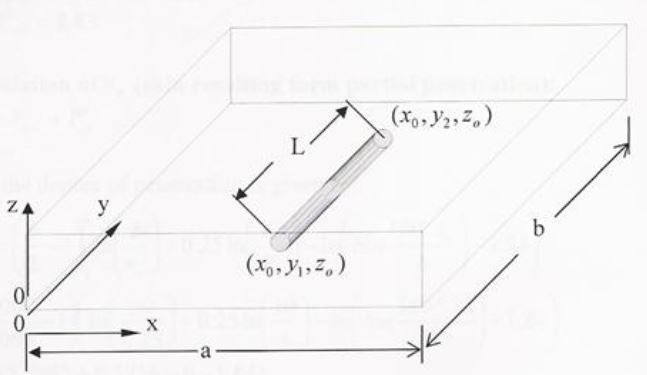

In [19]:
from IPython.display import Image
Image("images/babu_odeh_model.jpg") 

<h5><center>Babu and Odeh Model of horizontal well in reservoir - From Hill et at. (2007) </center></h5>  

Babu and Odeh model is given by: 

$$q =\frac{ \sqrt{k_y k_z} b (\bar{P} - P_{wf} ) }{ 141.2 \mu B_o ( ln [\frac{A^{0.5}}{ r_w }] + ln (C_H) - 0.75 + S_R + \frac{b}{L}s) }  $$

First we need to calculate the shape factor $C_H$
$$ lnC_H = 6.28 * \frac{a}{I_{ani} h }[\frac{1}{3} - \frac{y_0}{a} + (\frac{y_0}{a})^2] - ln(sin(\frac{\pi z_0 }{h}) - 0.5 ln[\frac{a}{I_{ani}  h} ] - 1.088$$

The partial penetration skin factor, $S_R$ is evaluated for two different cases, depending on the horizontal dimensions of the reservoir. The first case is for a reservoir that is widers while the second case is for a shorter reservoir ( b>a). 

Case 1 is given by: 
$$\frac{a}{\sqrt{k_y}} > 0.75 \frac{b}{\sqrt{k_z}} > 0.75 \frac{h}{\sqrt{k_z}}$$
Then, 

$$S_R = P_{xyz} + P'_{xy}$$
Case 2 is given by: 

$$\frac{b}{\sqrt{k_x}} > 1.33 \frac{a}{\sqrt{k_y}} >  \frac{h}{\sqrt{k_z}}$$




Where, 

$$P_{xyz} = ( \frac{b}{L} -1)[ ln \frac{h}{R_w} + 0.25 ln(\frac{k_x}{k_z} - ln(sin(\frac{\pi z}{h})) - 1.84]$$


We will only use case number 2 since it's the most common case found in the field. $S_R$ is given by

$$ S_R = P_{xyz} + P_y + P_{xy} $$
Where:

$$P_y = \frac{6.28 b^2}{a h}\frac{\sqrt{k_x k_z}}{k_y}[(\frac{1}{3} - \frac{x_{mid}}{b} + \frac{x_{mid}^2}{b^2}) + \frac{L}{24 b} (\frac{L}{b} - 3) $$


$$P_{xy} = (\frac{b}{L} - 1)\frac{6.28 a}{h}\frac{\sqrt{k_z}}{k_x}[(\frac{1}{3} - \frac{y_0}{a} + \frac{y_0^2}{a^2}) + \frac{L}{24 b}  $$

In [70]:
a = 2*yb 
b = L
x_1 = 0 
x_2 = L
y_0 = a/2 
z_0 = h/2 
kx = ky
kz = kv
kv = kh
xmid = (x_1 + x_2)/ 2
print(a,b, x_1, x_2, y_0, z_0)



1000.0 4000.0 0 4000.0 500.0 50.0


First we calculate shape factor $C_H$

In [77]:
LogCH =  6.28 * ( a / (Iani* h )) *(1.0/3.0 - y_0/a + (y_0/a)**2 ) - np.log(np.sin( np.pi * z_0 / h) ) -  0.5 * np.log(a / ( Iani * h )) - 1.088

Pxyz = (b/L - 1)* np.log(h/rw) + 0.25 * np.log(kx/kz) - np.log(np.sin((np.pi * z_0)/h )) - 1.84

Pxy = (b/L - 1) * (6.28 * a)/h * (np.sqrt(kz)/kx)* (1/3 - y_0 /a + y_0**2/a**2 ) + L / (24*b)

Py = 6.28* b**2 / (a*h) * np.sqrt(kx*kz)/ky * (1/3 - xmid / b + xmid**2/b**2) + L/(24*b)*(L/b - 3) 


S_R = Pxyz + Pxy + Py

A = a * h 


-0.00872096442706 -1.26435372675 0.0416666666667 26.3954716078 S_R= 0 6378.33429966


If the well is fully penetrating the reservoir, this is b = L, then the partial skin factor, $S_R = 0 $ 

In [83]:
if b == L :
    S_R = 0 
    
NUM = np.sqrt(ky*kz) * b * (Pe - Pwf) 
Dem_2 = (141.2 * Bo * mu) * (np.log( A**0.5 /rw ) + LogCH - 0.75 + S_R + s)
Qo_Babu =  NUM/Dem_2
#print(LogCH, Pxyz, Pxy, Py,'S_R=',  S_R, Qo_Babu)

print('Qo_Babu = ', Qo_Babu , 'STB/day')

Qo_Babu =  6378.33429966 STB/day


In [12]:
from bokeh.plotting import figure, output_file, show
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

L_lin = np.linspace(1, 4000, num=10)

def fBokeh(kh, kv, Iani, L, Bo, mu, s, rw, yb, h, Pe, Pwf ):
    k_bar = np.sqrt(kh/kv)
    Num_1 = (k_bar * L_lin * 1)
    Dem_2 = (141.2 * Bo * mu )* (np.log( h *Iani / (rw * ( Iani + 1))) + (np.pi * yb)/(Iani * h) - 1.224 + s)
    Y = Num_1/Dem_2
    fig = figure(plot_width=700, plot_height=400)
    # add both a line and circles on the same plot
    fig.line(L_lin, Y, line_width=2)
    fig.circle(L_lin, Y, fill_color="green", size=8)
    # add both a line and circles on the same plot
    fig.line(L_lin, Y, line_width=2)
    fig.xaxis.axis_label = "Lenght (ft)"
    fig.yaxis.axis_label = "Production, Q (STB/Psi)"
    show(fig)


WellboreLenght_Plot = interact(fBokeh,  kh= sliders[0], kv = sliders[1], Iani =sliders[2], 
                                   L = sliders[3], mu = sliders[4], Bo = sliders[5], 
                                   s = sliders[6], rw = sliders[7], yb =  sliders[8],
                                   h = sliders[9], Pe = sliders[10], Pwf=sliders[11],continuous_update=False)    
WellboreLenght_Plot

A Jupyter Widget

<function __main__.fBokeh>

In [13]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_file, show
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
output_notebook()

x = [x*1 for x in range(0, 200)]



y = x
z=x

k_bar = math.sqrt(kh*kv/kv+kh)

source = ColumnDataSource(data=dict(x=x, y=y))

source2 = ColumnDataSource(data=dict(x=x, y=y, z=z))

plot = Figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)




NUM = k_bar * L * (Pe - Pwf) 
Dem_1 = 141.2 * Bo * mu 
Dem_2 = math.log( Iani*h / (rw * ( Iani + 1))) + (math.pi * yb)/(Iani * h) - 1.224 + s
Q = k_bar * L * (50) /(Dem_1*Dem_2)

print(NUM)
print(Dem_1)
print(Dem_2)


callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var k_bar  = Math.sqrt(10)
    var L = 3200
    var Pe = 2
    var Pwf = 1
    var Bo = 1.1
    var s = 0.0 
    var Yb = 500.0
    var Pe = 1000.0
    var Rw = 0.25 
    var h = 100 
    var u = 2.0 

    var Dem_1 = 141.2 * Bo * u 
    var Iani = cb_obj.value
    var Dem_2 = Math.log( Iani / (Rw * ( Iani + 1))) + (Math.PI * Yb)/(Iani * h) - 1.224 + s

    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
    Dem_2 = Math.log( Iani / (Rw * ( Iani))) + (Math.PI * Yb)/(Iani * h) - 1.224 + s
        y[i] =  1/x[i] * (k_bar * L ) /( Dem_1 * Dem_2) 
    
}
    source.change.emit();
""")

slider = Slider(start=0.01, end= 10, value=1, step= 0.1, title="Iani")
slider.js_on_change('value', callback)


layout = column(slider, plot)

show(layout)

Loading BokehJS ...

TypeError: only length-1 arrays can be converted to Python scalars

### References


-  [1]  Hill, A.D., et al. Multilateral Wells, Society of Petroleum Engineers, 2007. ProQuest Ebook Central, [tamu.library.com](https://ebookcentral.proquest.com.ezproxy.library.tamu.edu/lib/tamucs/detail.action?docID=3404994).
